# test block-tower generation

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from block_towers.cubes import gen_start_positions_cubes
from block_towers.simulation import generate_batch_initial_positions
from block_towers.render import show_tower_grid

In [4]:
generate_batch_initial_positions?

Signature:
generate_batch_initial_positions(
    gen_fun,
    num_blocks=3,
    side_length=0.4,
    std=0.35,
    truncate=0.6,
    num_samples=1000,
    pct_fall=0.5,
    mb=None,
)
Docstring: <no docstring>
File:      ~/work/GitHub/block-towers/block_towers/simulation.py
Type:      function

In [5]:
# stable, unstable = generate_batch_initial_positions(gen_start_positions_cubes,
#                                                     num_blocks=3, side_length=.4,
#                                                     std=0.350, truncate=.60, num_samples=1000,
#                                                     pct_fall=0.50)
stable, unstable = generate_batch_initial_positions(gen_start_positions_cubes,
                                                    num_blocks=5, side_length=.4,
                                                    std=0.350, truncate=.60, num_samples=1000,
                                                    pct_fall=0.50)
len(stable), len(unstable)

(500, 500)

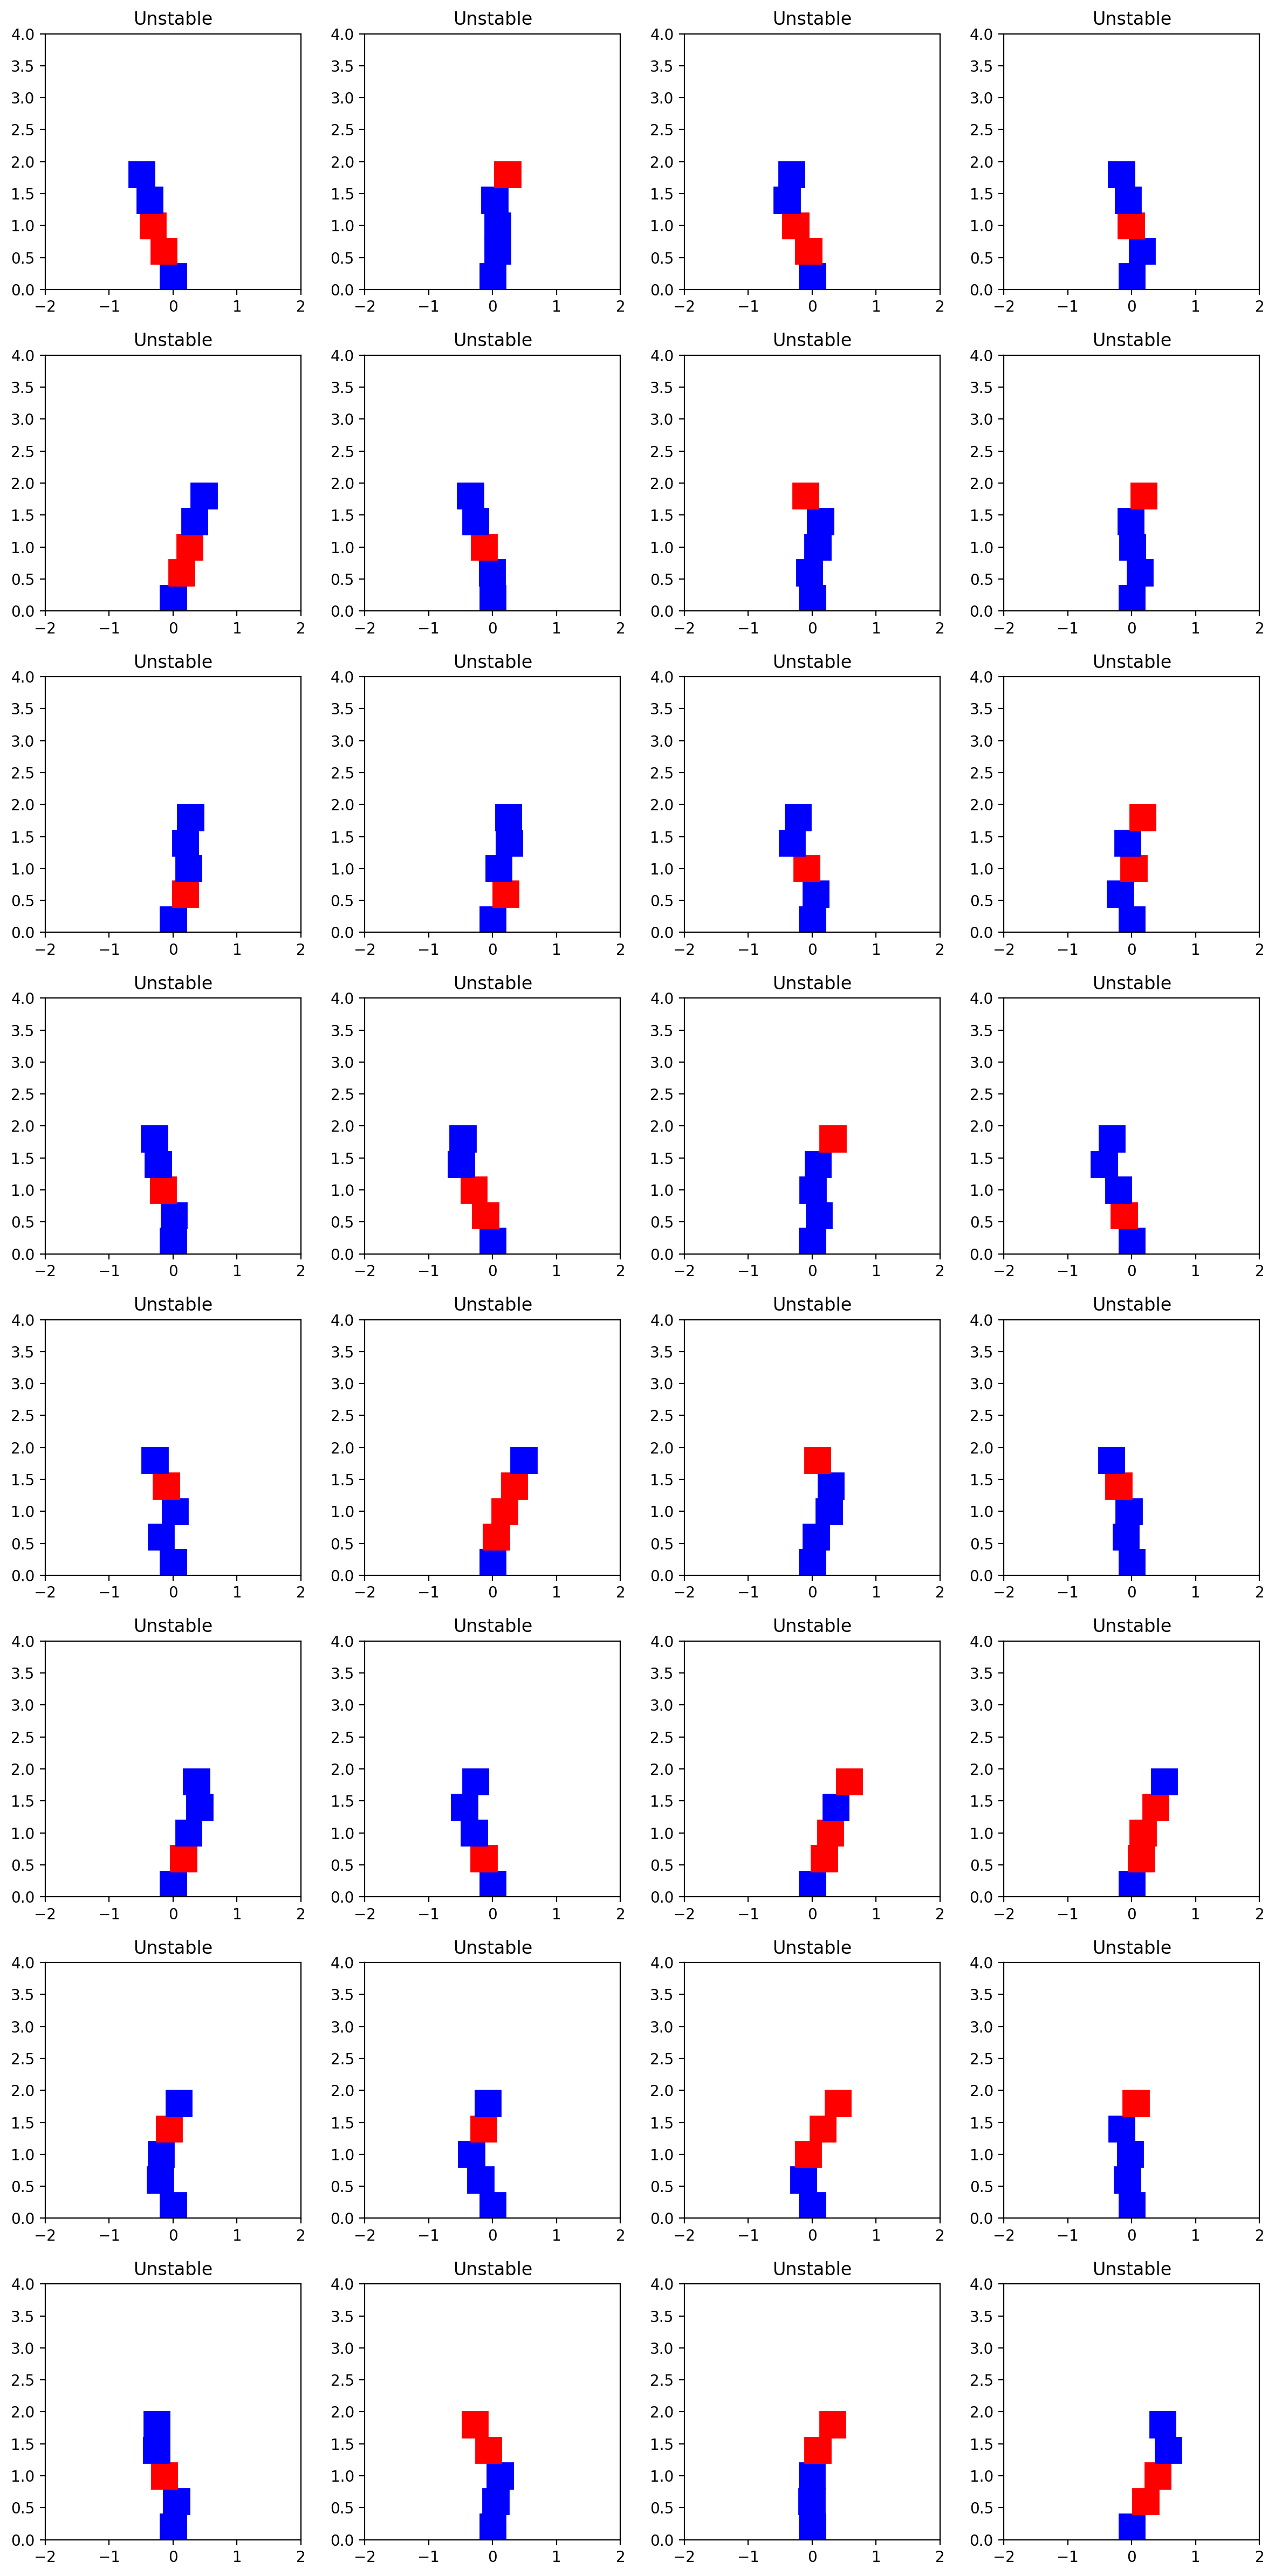

In [6]:
show_tower_grid(unstable[0:32])

# test physics world model

In [9]:
from block_towers.world_models import generate_xml_model_from_start_positions, print_world_model
from block_towers.simulation import generate_trajectory
from block_towers.render import display_video

In [10]:
world_model = generate_xml_model_from_start_positions(unstable[0])
print_world_model(world_model)

<mujoco model="tippe top">

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3" rgb2=".2 .3 .4" width="600" height="600"/>
    <material name="grid" texture="grid" texrepeat="14 14" reflectance="0"/>
  </asset>

  <worldbody>
    <geom name="floor" size="1 1 .01" type="plane" material="grid"/>
    <light pos="0 0 1" castshadow="false" diffuse="1 1 1"/>
    <camera name="closeup" fovy="45" mode="targetbody" target="lookhere" pos="0 -4.0 0.4" xyaxes="1 0 0 0 1 2"/>
  
    <body name="box0" pos="0.000000 0.000000 0.200000">
      <joint type="free"/>
      <geom name="box0" type="box" size="0.200000 0.200000 0.200000" rgba="1.000 0.000 0.000 1.000"/>
    </body>
  

    <body name="box1" pos="-0.145930 0.000000 0.600000">
      <joint type="free"/>
      <geom name="box1" type="box" size="0.200000 0.200000 0.200000" rgba="1.000 1.000 0.000 1.000"/>
    </body>
  

    <body name="box2" pos="-0.316307 0.000000 1.000000">
      <joint type="free"/>
      <geom nam

# test physics rendering

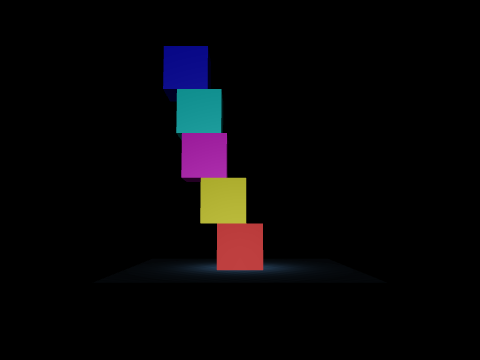

In [11]:
import PIL
from dm_control import mujoco

render_opts = dict(height=360,width=480,camera_id="closeup")
physics = mujoco.Physics.from_xml_string(world_model)
pixels = physics.render(**render_opts)
PIL.Image.fromarray(pixels)

# test physics simulation and movie rendering

In [14]:
positions = unstable[0]
simulation, frames = generate_trajectory(positions, 
                                         generate_xml_model_from_start_positions,
                                         duration=3, 
                                         framerate=60, 
                                         timestep=.001, 
                                         scale_factor=1.0, 
                                         render_frames=True)
print(simulation.keys())
print(f"Num video frames: {len(frames)}")

dict_keys(['params', 'start_positions', 'final_positions', 'trajectory'])
Num video frames: 180


In [15]:
display_video(frames, simulation['params']['framerate'])

In [20]:
len(simulation['start_positions'])
simulation['final_positions']

[{'x': 0.002444382704232171,
  'y': -5.071895524689206e-07,
  'z': 0.1998922445797834},
 {'x': -0.4193643102522508,
  'y': -0.0006731587128804316,
  'z': 0.19989224457978386},
 {'x': -0.9541296080641607,
  'y': -0.00025013813714744624,
  'z': 0.19989224457978383},
 {'x': -1.4701021755378703,
  'y': 0.00026354561763203407,
  'z': 0.19989224457978363},
 {'x': -2.3557572245275287,
  'y': 0.0029348266391504268,
  'z': 0.19989224457978347}]

# test frame generation from "stored" trajectory

In [22]:
from block_towers.world_models import generate_xml_model_from_start_positions as xml_fun
from block_towers.render import render_from_simulation

In [27]:
render_opts = dict(height=360,width=480,camera_id="closeup")
frames = render_from_simulation(simulation, xml_fun, render_opts=render_opts)
display_video(frames, simulation['params']['framerate'])